In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# In this tutorial, we will be training a lot of models. In order to use GPU memory cautiously,
# we will set tensorflow option to grow GPU memory allocation when required.
physical_devices = tf.config.list_physical_devices('GPU') 
if len(physical_devices)>0:
   tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [2]:
"""class NeuralNetwork(tf.keras.Model):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.sequence = keras.Sequential([
      keras.layers.Input(shape=(29,)),
      keras.layers.Dense(20, activation='relu'),
      keras.layers.Dense(3, activation = "softmax")
    ])

  def call(self, x: tf.Tensor) -> tf.Tensor:
    y_prime = self.sequence(x)
    return y_prime"""

'class NeuralNetwork(tf.keras.Model):\n  def __init__(self):\n    super(NeuralNetwork, self).__init__()\n    self.sequence = keras.Sequential([\n      keras.layers.Input(shape=(29,)),\n      keras.layers.Dense(20, activation=\'relu\'),\n      keras.layers.Dense(3, activation = "softmax")\n    ])\n\n  def call(self, x: tf.Tensor) -> tf.Tensor:\n    y_prime = self.sequence(x)\n    return y_prime'

In [37]:
class NeuralNetwork(tf.keras.Model):
  def __init__(self, batch_size,hidden_layers_sizes,activation_fn):
    super(NeuralNetwork, self).__init__()
    self.sequence = keras.models.Sequential()
    self.sequence.add(keras.layers.Input(shape=(29,)))#, batch_size=batch_size))
    for i in hidden_layers_sizes:
        self.sequence.add(tf.keras.layers.Dense(i, activation=activation_fn))
    self.sequence.add(tf.keras.layers.Dense(3,activation='softmax'))
  def call(self, x: tf.Tensor) -> tf.Tensor:
    y_prime = self.sequence(x)
    return y_prime

In [4]:
model = NeuralNetwork(32,[20,20],"relu")

In [5]:
model.build((1,29))

In [6]:
model.summary()

Model: "neural_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 3)                 1083      
                                                                 
Total params: 1,083
Trainable params: 1,083
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(29,)))
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(3, activation = "softmax"))
model.summary()"""

'model = keras.models.Sequential()\nmodel.add(keras.layers.Input(shape=(29,)))\nmodel.add(keras.layers.Dense(20, activation=\'relu\'))\nmodel.add(keras.layers.Dense(3, activation = "softmax"))\nmodel.summary()'

In [8]:
def get_data( dataframe): #-> Tuple[tf.data.Dataset, tf.data.Dataset]:
  image_size = 28
  num_train = 770
  num_test = 194
  
  training_data, testing_data = train_test_split(dataframe, test_size=0.2, random_state=25)
  training_data = training_data.to_numpy()
  testing_data = testing_data.to_numpy()

  return (training_data, testing_data)

In [9]:
dataframe = pd.read_csv("data/data_set_prepared.csv")
x = dataframe.iloc[:,:29]

In [10]:
y= dataframe.iloc[:,29:]

In [11]:
x_training, x_test = get_data(x)
y_training, y_test = get_data(y)

In [12]:
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), optimizer="sgd",metrics=['acc'])#,'val_loss','val_acc'])

In [13]:
EPOCHS = 2000
hist = model.fit(x_training,y_training,validation_data=(x_test,y_test),epochs=EPOCHS,batch_size=32)

Epoch 1/2000
25/25 [==============================] - 1s 9ms/step - loss: 1.0111 - acc: 0.4721 - val_loss: 1.0049 - val_acc: 0.4715
Epoch 2/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.9663 - acc: 0.5123 - val_loss: 0.9809 - val_acc: 0.4611
Epoch 3/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.9374 - acc: 0.5305 - val_loss: 0.9699 - val_acc: 0.4611
Epoch 4/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.9205 - acc: 0.5188 - val_loss: 0.9642 - val_acc: 0.4870
Epoch 5/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.9095 - acc: 0.5344 - val_loss: 0.9608 - val_acc: 0.4611
Epoch 6/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.9006 - acc: 0.5383 - val_loss: 0.9603 - val_acc: 0.4715
Epoch 7/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.8943 - acc: 0.5383 - val_loss: 0.9581 - val_acc: 0.4663
Epoch 8/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.

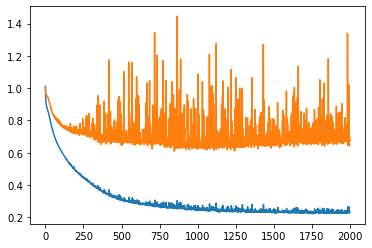

In [14]:
for x in ['loss','val_loss']:
    plt.plot(hist.history[x],label=f"Historic vers ")

In [15]:
def graph_loss_vs_epochs(history):#, save_image_filename, title):
    training_loss = history.history['loss']
    test_loss = history.history['val_loss'] #[10 9 8 5 6 7] 3

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1) #[1 2 3 4 5 6]

    # Visualize loss history
    plt.title("title")
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    #plt.savefig(save_image_filename) 
    plt.axvline(x = epoch_count[test_loss.index(min(test_loss))], color = 'c', linestyle="dotted")
    plt.show()

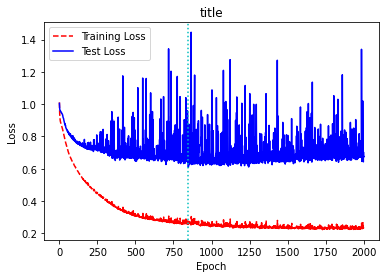

In [16]:
graph_loss_vs_epochs(hist)

In [19]:
model = NeuralNetwork(32,[20,20],"softplus")
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), optimizer="sgd",metrics=['acc'])#,'val_loss','val_acc'])
EPOCHS = 2000
hist = model.fit(x_training,y_training,validation_data=(x_test,y_test),epochs=EPOCHS,batch_size=32)

Epoch 1/2000
25/25 [==============================] - 0s 9ms/step - loss: 1.1419 - acc: 0.2931 - val_loss: 1.0456 - val_acc: 0.4197
Epoch 2/2000
25/25 [==============================] - 0s 6ms/step - loss: 0.9714 - acc: 0.5006 - val_loss: 1.0136 - val_acc: 0.3886
Epoch 3/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.9397 - acc: 0.4864 - val_loss: 1.0076 - val_acc: 0.3886
Epoch 4/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.9280 - acc: 0.5110 - val_loss: 1.0062 - val_acc: 0.3938
Epoch 5/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.9204 - acc: 0.5214 - val_loss: 1.0043 - val_acc: 0.4093
Epoch 6/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.9154 - acc: 0.5253 - val_loss: 1.0075 - val_acc: 0.4715
Epoch 7/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.9101 - acc: 0.5331 - val_loss: 1.0023 - val_acc: 0.5181
Epoch 8/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.

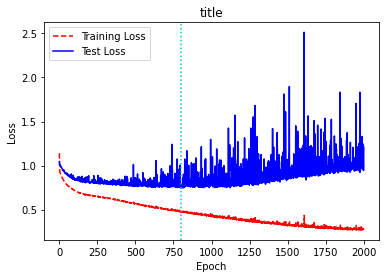

In [20]:
graph_loss_vs_epochs(hist)

In [21]:
model = NeuralNetwork(32,[20],"relu")
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), optimizer="sgd",metrics=['acc'])#,'val_loss','val_acc'])
EPOCHS = 2000
hist20 = model.fit(x_training,y_training,validation_data=(x_test,y_test),epochs=EPOCHS)

Epoch 1/2000
25/25 [==============================] - 0s 9ms/step - loss: 1.0685 - acc: 0.4695 - val_loss: 1.0342 - val_acc: 0.5233
Epoch 2/2000
25/25 [==============================] - 0s 6ms/step - loss: 0.9562 - acc: 0.5525 - val_loss: 0.9885 - val_acc: 0.5440
Epoch 3/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.9114 - acc: 0.5629 - val_loss: 0.9718 - val_acc: 0.5389
Epoch 4/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.8905 - acc: 0.5642 - val_loss: 0.9643 - val_acc: 0.5389
Epoch 5/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.8768 - acc: 0.5746 - val_loss: 0.9587 - val_acc: 0.5544
Epoch 6/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.8658 - acc: 0.5875 - val_loss: 0.9546 - val_acc: 0.5544
Epoch 7/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.8571 - acc: 0.6057 - val_loss: 0.9478 - val_acc: 0.5544
Epoch 8/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.

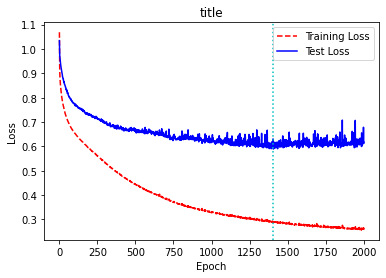

In [22]:
graph_loss_vs_epochs(hist20)

In [23]:
model = NeuralNetwork(32,[10],"relu")
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), optimizer="sgd",metrics=['acc'])#,'val_loss','val_acc'])
EPOCHS = 2000
hist10 = model.fit(x_training,y_training,validation_data=(x_test,y_test),epochs=EPOCHS)

Epoch 1/2000
25/25 [==============================] - 0s 9ms/step - loss: 1.0323 - acc: 0.4864 - val_loss: 0.9905 - val_acc: 0.4767
Epoch 2/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.9590 - acc: 0.5344 - val_loss: 0.9562 - val_acc: 0.4456
Epoch 3/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.9160 - acc: 0.5447 - val_loss: 0.9387 - val_acc: 0.5285
Epoch 4/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.8906 - acc: 0.6122 - val_loss: 0.9281 - val_acc: 0.5389
Epoch 5/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.8748 - acc: 0.6213 - val_loss: 0.9227 - val_acc: 0.5492
Epoch 6/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.8616 - acc: 0.6511 - val_loss: 0.9166 - val_acc: 0.5440
Epoch 7/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.8509 - acc: 0.6459 - val_loss: 0.9133 - val_acc: 0.5492
Epoch 8/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.

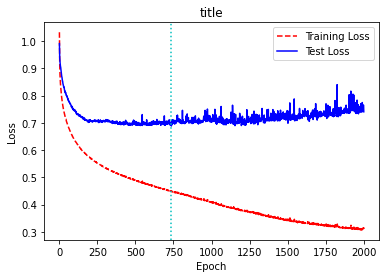

In [24]:
graph_loss_vs_epochs(hist10)

In [25]:
model = NeuralNetwork(32,[30],"relu")
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), optimizer="sgd",metrics=['acc'])#,'val_loss','val_acc'])
EPOCHS = 2000
hist10 = model.fit(x_training,y_training,validation_data=(x_test,y_test),epochs=EPOCHS)

Epoch 1/2000
25/25 [==============================] - 0s 9ms/step - loss: 0.9664 - acc: 0.5370 - val_loss: 0.9935 - val_acc: 0.4715
Epoch 2/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.9183 - acc: 0.5668 - val_loss: 0.9745 - val_acc: 0.5337
Epoch 3/2000
25/25 [==============================] - 0s 6ms/step - loss: 0.8926 - acc: 0.6044 - val_loss: 0.9637 - val_acc: 0.5285
Epoch 4/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.8743 - acc: 0.6122 - val_loss: 0.9578 - val_acc: 0.5544
Epoch 5/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.8621 - acc: 0.6187 - val_loss: 0.9539 - val_acc: 0.5492
Epoch 6/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.8524 - acc: 0.6291 - val_loss: 0.9520 - val_acc: 0.5699
Epoch 7/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.8446 - acc: 0.6187 - val_loss: 0.9480 - val_acc: 0.5699
Epoch 8/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.

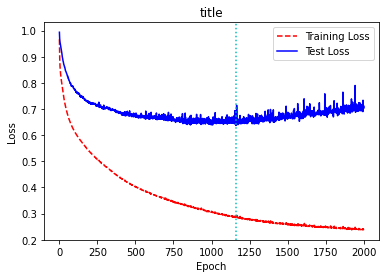

In [26]:
graph_loss_vs_epochs(hist10)

In [29]:
model = NeuralNetwork(32,[20],"relu")
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), optimizer="sgd",metrics=['acc'])#,'val_loss','val_acc'])
EPOCHS = 3000
hist10 = model.fit(x_training,y_training,validation_data=(x_test,y_test),epochs=EPOCHS, batch_size=64)

Epoch 1/3000
13/13 [==============================] - 0s 16ms/step - loss: 1.3068 - acc: 0.2088 - val_loss: 1.1800 - val_acc: 0.2487
Epoch 2/3000
13/13 [==============================] - 0s 7ms/step - loss: 1.1365 - acc: 0.3346 - val_loss: 1.0838 - val_acc: 0.3679
Epoch 3/3000
13/13 [==============================] - 0s 6ms/step - loss: 1.0460 - acc: 0.4475 - val_loss: 1.0234 - val_acc: 0.4611
Epoch 4/3000
13/13 [==============================] - 0s 6ms/step - loss: 0.9852 - acc: 0.4851 - val_loss: 0.9902 - val_acc: 0.5026
Epoch 5/3000
13/13 [==============================] - 0s 7ms/step - loss: 0.9485 - acc: 0.5266 - val_loss: 0.9680 - val_acc: 0.5233
Epoch 6/3000
13/13 [==============================] - 0s 6ms/step - loss: 0.9208 - acc: 0.5616 - val_loss: 0.9563 - val_acc: 0.5285
Epoch 7/3000
13/13 [==============================] - 0s 7ms/step - loss: 0.9054 - acc: 0.5642 - val_loss: 0.9467 - val_acc: 0.5130
Epoch 8/3000
13/13 [==============================] - 0s 6ms/step - loss: 0

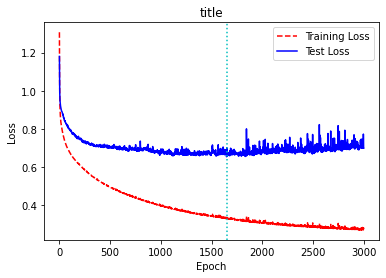

In [30]:
graph_loss_vs_epochs(hist10)

In [31]:
model = NeuralNetwork(32,[20],"relu")
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), optimizer="sgd",metrics=['acc'])#,'val_loss','val_acc'])
EPOCHS = 2000
hist128 = model.fit(x_training,y_training,validation_data=(x_test,y_test),epochs=EPOCHS, batch_size=128)

Epoch 1/2000
7/7 [==============================] - 0s 24ms/step - loss: 1.2971 - acc: 0.1492 - val_loss: 1.2255 - val_acc: 0.2332
Epoch 2/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.1884 - acc: 0.2490 - val_loss: 1.1570 - val_acc: 0.2850
Epoch 3/2000
7/7 [==============================] - 0s 10ms/step - loss: 1.1195 - acc: 0.3346 - val_loss: 1.1204 - val_acc: 0.3005
Epoch 4/2000
7/7 [==============================] - 0s 10ms/step - loss: 1.0805 - acc: 0.3904 - val_loss: 1.0863 - val_acc: 0.3731
Epoch 5/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.0400 - acc: 0.4604 - val_loss: 1.0608 - val_acc: 0.4560
Epoch 6/2000
7/7 [==============================] - 0s 8ms/step - loss: 1.0069 - acc: 0.5123 - val_loss: 1.0424 - val_acc: 0.4197
Epoch 7/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.9837 - acc: 0.5110 - val_loss: 1.0293 - val_acc: 0.4611
Epoch 8/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.9655 - acc: 

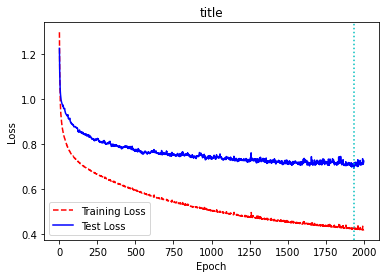

In [32]:
graph_loss_vs_epochs(hist128)

In [33]:
model = NeuralNetwork(32,[20],"relu")
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.SGD(learning_rate=0.05),metrics=['acc'])#,'val_loss','val_acc'])
EPOCHS = 2000
hist128 = model.fit(x_training,y_training,validation_data=(x_test,y_test),epochs=EPOCHS, batch_size=32)

Epoch 1/2000
25/25 [==============================] - 0s 9ms/step - loss: 0.9451 - acc: 0.5953 - val_loss: 0.9317 - val_acc: 0.5803
Epoch 2/2000
25/25 [==============================] - 0s 6ms/step - loss: 0.8363 - acc: 0.6433 - val_loss: 0.9217 - val_acc: 0.5699
Epoch 3/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.8031 - acc: 0.6550 - val_loss: 0.8927 - val_acc: 0.6062
Epoch 4/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.7782 - acc: 0.6446 - val_loss: 0.8733 - val_acc: 0.6321
Epoch 5/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.7624 - acc: 0.6576 - val_loss: 0.8666 - val_acc: 0.5544
Epoch 6/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.7447 - acc: 0.6537 - val_loss: 0.8372 - val_acc: 0.6114
Epoch 7/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.7327 - acc: 0.6667 - val_loss: 0.8285 - val_acc: 0.5803
Epoch 8/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.

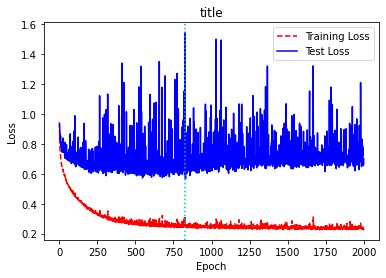

In [34]:
graph_loss_vs_epochs(hist128)

In [68]:

model = NeuralNetwork(32,[20],"relu")
model.compile(loss='categorical_crossentropy', optimizer="sgd",metrics=['acc'])#,'val_loss','val_acc'])
EPOCHS = 1500
train_evaluate_model(x_training,y_training,x_test,y_test,EPOCHS,32,model,'model_20relu_cc_sgd_b32','his_20relu_cc_sgd_b32')

Epoch 1/2000

Epoch 1: val_loss improved from inf to 0.98597, saving model to model_20relu_cc_sgd_b32.h5


NotImplementedError: Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.

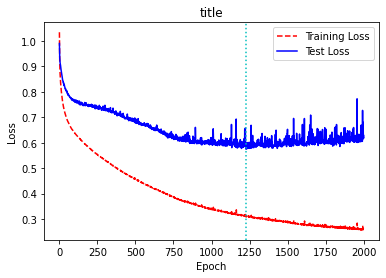

In [57]:
graph_loss_vs_epochs(hist20)

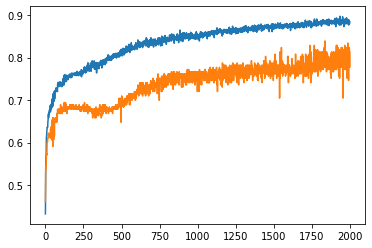

In [58]:
for x in ['acc','val_acc']:
    plt.plot(hist20.history[x],label=f"Historic vers ")

In [ ]:
model = NeuralNetwork(32,[20],"relu")
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.SGD(learning_rate=0.01),metrics=['acc'])#,'val_loss','val_acc'])
EPOCHS = 3000
hist128 = model.fit(x_training,y_training,validation_data=(x_test,y_test),epochs=EPOCHS, batch_size=64)

In [42]:
model = NeuralNetwork(32,[20],"relu")
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), optimizer="sgd",metrics=['acc'])#,'val_loss','val_acc'])
EPOCHS = 3000
hist128 = model.fit(x_training,y_training,validation_data=(x_test,y_test),epochs=EPOCHS, batch_size=64)

Epoch 1/3000
13/13 [==============================] - 0s 15ms/step - loss: 1.0147 - acc: 0.4241 - val_loss: 1.0677 - val_acc: 0.3679
Epoch 2/3000
13/13 [==============================] - 0s 7ms/step - loss: 0.9811 - acc: 0.4527 - val_loss: 1.0419 - val_acc: 0.3990
Epoch 3/3000
13/13 [==============================] - 0s 6ms/step - loss: 0.9517 - acc: 0.4955 - val_loss: 1.0199 - val_acc: 0.4611
Epoch 4/3000
13/13 [==============================] - 0s 7ms/step - loss: 0.9277 - acc: 0.5344 - val_loss: 1.0071 - val_acc: 0.5026
Epoch 5/3000
13/13 [==============================] - 0s 6ms/step - loss: 0.9113 - acc: 0.5551 - val_loss: 0.9963 - val_acc: 0.4922
Epoch 6/3000
13/13 [==============================] - 0s 6ms/step - loss: 0.8978 - acc: 0.5642 - val_loss: 0.9892 - val_acc: 0.4870
Epoch 7/3000
13/13 [==============================] - 0s 6ms/step - loss: 0.8882 - acc: 0.5642 - val_loss: 0.9814 - val_acc: 0.4870
Epoch 8/3000
13/13 [==============================] - 0s 6ms/step - loss: 0

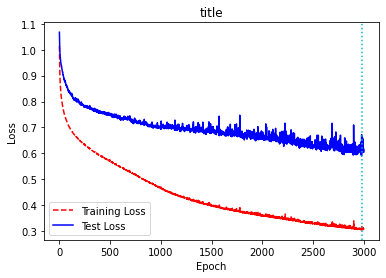

In [43]:
graph_loss_vs_epochs(hist128)

In [44]:
model = NeuralNetwork(32,[15],"relu")
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), optimizer="sgd",metrics=['acc'])#,'val_loss','val_acc'])
EPOCHS = 3000
hist128 = model.fit(x_training,y_training,validation_data=(x_test,y_test),epochs=EPOCHS, batch_size=32)

Epoch 1/3000
25/25 [==============================] - 0s 9ms/step - loss: 1.2500 - acc: 0.2776 - val_loss: 1.1010 - val_acc: 0.4301
Epoch 2/3000
25/25 [==============================] - 0s 6ms/step - loss: 1.0472 - acc: 0.4929 - val_loss: 1.0063 - val_acc: 0.5337
Epoch 3/3000
25/25 [==============================] - 0s 5ms/step - loss: 0.9713 - acc: 0.5707 - val_loss: 0.9700 - val_acc: 0.5596
Epoch 4/3000
25/25 [==============================] - 0s 5ms/step - loss: 0.9321 - acc: 0.5772 - val_loss: 0.9507 - val_acc: 0.5648
Epoch 5/3000
25/25 [==============================] - 0s 5ms/step - loss: 0.9055 - acc: 0.6096 - val_loss: 0.9393 - val_acc: 0.5699
Epoch 6/3000
25/25 [==============================] - 0s 4ms/step - loss: 0.8891 - acc: 0.6109 - val_loss: 0.9310 - val_acc: 0.5751
Epoch 7/3000
25/25 [==============================] - 0s 4ms/step - loss: 0.8760 - acc: 0.6148 - val_loss: 0.9254 - val_acc: 0.5803
Epoch 8/3000
25/25 [==============================] - 0s 4ms/step - loss: 0.

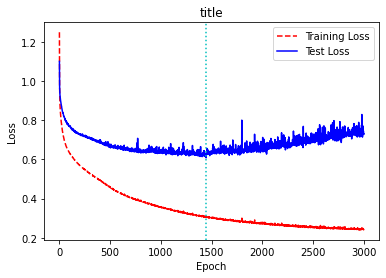

In [45]:
graph_loss_vs_epochs(hist128)

In [54]:
model = NeuralNetwork(32,[20],"relu")
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['acc'])#,'val_loss','val_acc'])
EPOCHS = 3000
hist128 = model.fit(x_training,y_training,validation_data=(x_test,y_test),epochs=EPOCHS, batch_size=32)

Epoch 1/3000


C:\Users\Kevin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


25/25 [==============================] - 1s 13ms/step - loss: 1.4005 - acc: 0.3450 - val_loss: 1.1168 - val_acc: 0.3938
Epoch 2/3000
25/25 [==============================] - 0s 7ms/step - loss: 1.1171 - acc: 0.4176 - val_loss: 1.0066 - val_acc: 0.4041
Epoch 3/3000
25/25 [==============================] - 0s 8ms/step - loss: 1.0404 - acc: 0.4617 - val_loss: 0.9630 - val_acc: 0.5285
Epoch 4/3000
25/25 [==============================] - 0s 7ms/step - loss: 0.9558 - acc: 0.5214 - val_loss: 0.9439 - val_acc: 0.5544
Epoch 5/3000
25/25 [==============================] - 0s 7ms/step - loss: 0.9218 - acc: 0.5331 - val_loss: 0.9309 - val_acc: 0.5596
Epoch 6/3000
25/25 [==============================] - 0s 5ms/step - loss: 0.9159 - acc: 0.5655 - val_loss: 0.9158 - val_acc: 0.5803
Epoch 7/3000
25/25 [==============================] - 0s 5ms/step - loss: 0.8994 - acc: 0.5863 - val_loss: 0.9048 - val_acc: 0.5648
Epoch 8/3000
25/25 [==============================] - 0s 5ms/step - loss: 0.8493 - acc: 

In [46]:
model = NeuralNetwork(32,[15],"relu")
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), optimizer="sgd",metrics=['acc'])#,'val_loss','val_acc'])
EPOCHS = 3000
hist128 = model.fit(x_training,y_training,validation_data=(x_test,y_test),epochs=EPOCHS, batch_size=16)

Epoch 1/3000
49/49 [==============================] - 1s 7ms/step - loss: 1.1347 - acc: 0.4163 - val_loss: 1.1094 - val_acc: 0.4404
Epoch 2/3000
49/49 [==============================] - 0s 6ms/step - loss: 0.9767 - acc: 0.5357 - val_loss: 1.0285 - val_acc: 0.5389
Epoch 3/3000
49/49 [==============================] - 0s 4ms/step - loss: 0.9207 - acc: 0.5603 - val_loss: 0.9984 - val_acc: 0.5389
Epoch 4/3000
49/49 [==============================] - 0s 4ms/step - loss: 0.8911 - acc: 0.5733 - val_loss: 0.9835 - val_acc: 0.5699
Epoch 5/3000
49/49 [==============================] - 0s 4ms/step - loss: 0.8718 - acc: 0.5953 - val_loss: 0.9657 - val_acc: 0.5492
Epoch 6/3000
49/49 [==============================] - 0s 3ms/step - loss: 0.8563 - acc: 0.6291 - val_loss: 0.9568 - val_acc: 0.5596
Epoch 7/3000
49/49 [==============================] - 0s 3ms/step - loss: 0.8433 - acc: 0.6433 - val_loss: 0.9477 - val_acc: 0.5699
Epoch 8/3000
49/49 [==============================] - 0s 3ms/step - loss: 0.

KeyboardInterrupt: 

In [ ]:
graph_loss_vs_epochs(hist128)

In [47]:
model = NeuralNetwork(32,[10,10],"relu")
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), optimizer="sgd",metrics=['acc'])#,'val_loss','val_acc'])
EPOCHS = 3000
hist128 = model.fit(x_training,y_training,validation_data=(x_test,y_test),epochs=EPOCHS, batch_size=32)

Epoch 1/3000
25/25 [==============================] - 0s 11ms/step - loss: 1.0932 - acc: 0.4708 - val_loss: 1.0707 - val_acc: 0.4508
Epoch 2/3000
25/25 [==============================] - 0s 6ms/step - loss: 1.0198 - acc: 0.5123 - val_loss: 1.0297 - val_acc: 0.4819
Epoch 3/3000
25/25 [==============================] - 0s 5ms/step - loss: 0.9793 - acc: 0.5279 - val_loss: 1.0035 - val_acc: 0.5026
Epoch 4/3000
25/25 [==============================] - 0s 5ms/step - loss: 0.9511 - acc: 0.5486 - val_loss: 0.9859 - val_acc: 0.5130
Epoch 5/3000
25/25 [==============================] - 0s 5ms/step - loss: 0.9308 - acc: 0.5538 - val_loss: 0.9751 - val_acc: 0.5130
Epoch 6/3000
25/25 [==============================] - 0s 4ms/step - loss: 0.9166 - acc: 0.5616 - val_loss: 0.9656 - val_acc: 0.5337
Epoch 7/3000
25/25 [==============================] - 0s 4ms/step - loss: 0.9051 - acc: 0.5681 - val_loss: 0.9624 - val_acc: 0.5337
Epoch 8/3000
25/25 [==============================] - 0s 4ms/step - loss: 0

In [ ]:
model = NeuralNetwork(32,[10,10],"relu")
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), optimizer="sgd",metrics=['acc'])#,'val_loss','val_acc'])
EPOCHS = 3000
hist128 = model.fit(x_training,y_training,validation_data=(x_test,y_test),epochs=EPOCHS, batch_size=32)

In [48]:
class NeuralNetwork(tf.keras.Model):
  def __init__(self, batch_size,hidden_layers_sizes,activation_fn):
    super(NeuralNetwork, self).__init__()
    self.sequence = keras.models.Sequential()
    self.sequence.add(keras.layers.Input(shape=(29,)))#, batch_size=batch_size))
    for i in hidden_layers_sizes:
        self.sequence.add(tf.keras.layers.Dense(i, activation=activation_fn))
        self.sequence.add(tf.keras.layers.Dropout(0.5))
    self.sequence.add(tf.keras.layers.Dense(3,activation='softmax'))
  def call(self, x: tf.Tensor) -> tf.Tensor:
    y_prime = self.sequence(x)
    return y_prime

In [49]:
model = NeuralNetwork(32,[20],"relu")
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.Cate,metrics=['acc'])#,'val_loss','val_acc'])
EPOCHS = 3000
hist128 = model.fit(x_training,y_training,validation_data=(x_test,y_test),epochs=EPOCHS, batch_size=32)

Epoch 1/3000
 1/25 [>.............................] - ETA: 5s - loss: 1.1841 - acc: 0.5000

C:\Users\Kevin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


25/25 [==============================] - 0s 8ms/step - loss: 1.1350 - acc: 0.4332 - val_loss: 1.0792 - val_acc: 0.4249
Epoch 2/3000
25/25 [==============================] - 0s 4ms/step - loss: 1.0386 - acc: 0.4643 - val_loss: 1.0372 - val_acc: 0.4249
Epoch 3/3000
25/25 [==============================] - 0s 4ms/step - loss: 1.0016 - acc: 0.4630 - val_loss: 1.0137 - val_acc: 0.4301
Epoch 4/3000
25/25 [==============================] - 0s 4ms/step - loss: 0.9756 - acc: 0.5110 - val_loss: 0.9983 - val_acc: 0.4352
Epoch 5/3000
25/25 [==============================] - 0s 3ms/step - loss: 0.9520 - acc: 0.5279 - val_loss: 0.9871 - val_acc: 0.4404
Epoch 6/3000
25/25 [==============================] - 0s 4ms/step - loss: 0.9464 - acc: 0.5383 - val_loss: 0.9783 - val_acc: 0.4663
Epoch 7/3000
25/25 [==============================] - 0s 4ms/step - loss: 0.9231 - acc: 0.5370 - val_loss: 0.9733 - val_acc: 0.4767
Epoch 8/3000
25/25 [==============================] - 0s 4ms/step - loss: 0.9180 - acc: 0

In [50]:
model = NeuralNetwork(32,[20],"relu")
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])#,'val_loss','val_acc'])
EPOCHS = 3000
hist128 = model.fit(x_training,y_training,validation_data=(x_test,y_test),epochs=EPOCHS, batch_size=32)

Epoch 1/3000
25/25 [==============================] - 0s 8ms/step - loss: 1.2323 - acc: 0.3619 - val_loss: 1.0520 - val_acc: 0.4715
Epoch 2/3000
25/25 [==============================] - 0s 4ms/step - loss: 1.0578 - acc: 0.4825 - val_loss: 0.9857 - val_acc: 0.5026
Epoch 3/3000
25/25 [==============================] - 0s 5ms/step - loss: 0.9785 - acc: 0.5227 - val_loss: 0.9541 - val_acc: 0.5389
Epoch 4/3000
25/25 [==============================] - 0s 4ms/step - loss: 0.9556 - acc: 0.5396 - val_loss: 0.9368 - val_acc: 0.5959
Epoch 5/3000
25/25 [==============================] - 0s 4ms/step - loss: 0.9330 - acc: 0.5357 - val_loss: 0.9223 - val_acc: 0.6114
Epoch 6/3000
25/25 [==============================] - 0s 4ms/step - loss: 0.8977 - acc: 0.5901 - val_loss: 0.9100 - val_acc: 0.6218
Epoch 7/3000
25/25 [==============================] - 0s 5ms/step - loss: 0.8958 - acc: 0.5499 - val_loss: 0.9007 - val_acc: 0.5907
Epoch 8/3000
25/25 [==============================] - 0s 4ms/step - loss: 0.

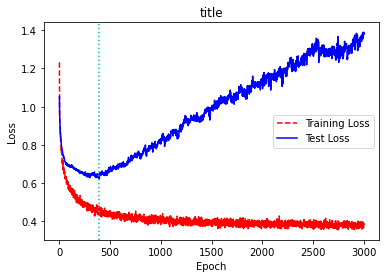

In [51]:
graph_loss_vs_epochs(hist128)

In [52]:
model = NeuralNetwork(32,[20],"relu")
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam',metrics=['acc'])#,'val_loss','val_acc'])
EPOCHS = 3000
hist128 = model.fit(x_training,y_training,validation_data=(x_test,y_test),epochs=EPOCHS, batch_size=32)

Epoch 1/3000
25/25 [==============================] - 0s 9ms/step - loss: 0.2225 - acc: 0.4462 - val_loss: 0.2003 - val_acc: 0.5078
Epoch 2/3000
25/25 [==============================] - 0s 5ms/step - loss: 0.2036 - acc: 0.4877 - val_loss: 0.1906 - val_acc: 0.5440
Epoch 3/3000
25/25 [==============================] - 0s 6ms/step - loss: 0.1878 - acc: 0.5383 - val_loss: 0.1844 - val_acc: 0.5596
Epoch 4/3000
25/25 [==============================] - 0s 6ms/step - loss: 0.1864 - acc: 0.5318 - val_loss: 0.1800 - val_acc: 0.5596
Epoch 5/3000
25/25 [==============================] - 0s 5ms/step - loss: 0.1735 - acc: 0.5629 - val_loss: 0.1771 - val_acc: 0.5596
Epoch 6/3000
25/25 [==============================] - 0s 6ms/step - loss: 0.1762 - acc: 0.5655 - val_loss: 0.1744 - val_acc: 0.5544
Epoch 7/3000
25/25 [==============================] - 0s 5ms/step - loss: 0.1692 - acc: 0.6031 - val_loss: 0.1725 - val_acc: 0.5699
Epoch 8/3000
25/25 [==============================] - 0s 5ms/step - loss: 0.

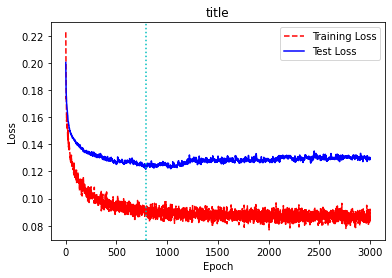

In [53]:
graph_loss_vs_epochs(hist128)

In [18]:
hist2 = model.fit(x_training,y_training,validation_data=(x_test,y_test),epochs=EPOCHS)
graph_loss_vs_epochs(hist2)

Epoch 1/2000
25/25 [==============================] - 0s 9ms/step - loss: 1.5008 - acc: 0.6498 - val_loss: 0.8530 - val_acc: 0.5648
Epoch 2/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.7287 - acc: 0.6732 - val_loss: 0.8329 - val_acc: 0.5855
Epoch 3/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.7259 - acc: 0.6913 - val_loss: 0.8345 - val_acc: 0.6010
Epoch 4/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.6445 - acc: 0.7315 - val_loss: 0.7916 - val_acc: 0.6269
Epoch 5/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.6551 - acc: 0.7017 - val_loss: 0.8515 - val_acc: 0.5699
Epoch 6/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.6398 - acc: 0.7328 - val_loss: 0.8944 - val_acc: 0.6218
Epoch 7/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.5932 - acc: 0.7367 - val_loss: 0.8270 - val_acc: 0.6269
Epoch 8/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.

KeyboardInterrupt: 

Epoch 1/1000
25/25 [==============================] - 0s 10ms/step - loss: 1.1774 - acc: 0.3606 - val_loss: 1.0033 - val_acc: 0.4663
Epoch 2/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.0249 - acc: 0.4747 - val_loss: 0.9493 - val_acc: 0.5233
Epoch 3/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.9732 - acc: 0.4942 - val_loss: 0.9280 - val_acc: 0.5181
Epoch 4/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.9544 - acc: 0.5175 - val_loss: 0.9174 - val_acc: 0.5285
Epoch 5/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.8974 - acc: 0.5629 - val_loss: 0.9078 - val_acc: 0.5233
Epoch 6/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.8994 - acc: 0.5811 - val_loss: 0.8973 - val_acc: 0.5440
Epoch 7/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.8747 - acc: 0.5888 - val_loss: 0.8871 - val_acc: 0.5648
Epoch 8/1000
25/25 [==============================] - 0s 5ms/step - loss: 0

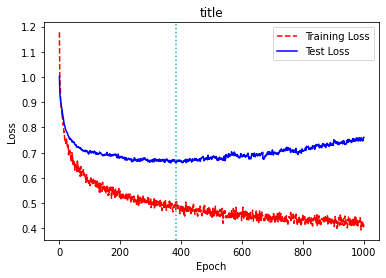

In [56]:
model = NeuralNetwork(32,[20],"relu")
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])#,'val_loss','val_acc'])
hist3 = model.fit(x_training,y_training,validation_data=(x_test,y_test),epochs=1000)
graph_loss_vs_epochs(hist3)

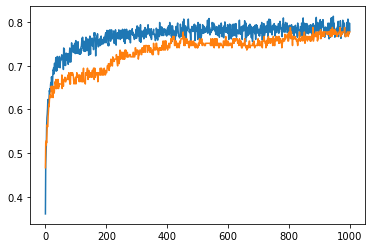

In [59]:
for x in ['acc','val_acc']:
    plt.plot(hist3.history[x],label=f"Historic vers ")

In [ ]:
class NeuralNetwork(tf.keras.Model):
  def __init__(self, batch_size,hidden_layers_sizes,activation_fn):
    super(NeuralNetwork, self).__init__()
    self.sequence = keras.models.Sequential()
    self.sequence.add(keras.layers.Input(shape=(29,)))#, batch_size=batch_size))
    for i in hidden_layers_sizes:
        self.sequence.add(tf.keras.layers.Dense(i, activation=activation_fn))
        self.sequence.add(tf.keras.layers.Dense(i, activation='sigmoid'))
    self.sequence.add(tf.keras.layers.Dense(3,activation='softmax'))

In [63]:
from keras.callbacks import ModelCheckpoint
def save_history(filename, model):
    # ejemplo de filename:'history1.npy'
    np.save(filename,model.history.history)
    
def train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name):
    checkpoint = ModelCheckpoint(model_save_file_name, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
    model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size,  validation_data=(testX, testY),callbacks=[checkpoint], verbose=2)
    save_history(history_save_file_name, model)

In [75]:
from keras.models import load_model
model = load_model('./model_20relu_cc_sgd_b32')
test_ds_df = pd.read_csv(f'./data/test_data_set_prepared.csv')

print(model.summary())

labels_map = {
    0:'Alto',
    1:'Bajo',
    2:'Moderado'
}

X = test_ds_df.to_numpy()
ids = []
id = 1
predictions = []
for x in X:
    x = x.reshape(1,29)
    predicted_vector = model.predict(x)
    predicted_index = np.argmax(predicted_vector)
    predicted_name = labels_map[predicted_index]
    ids.append(id)
    id = id + 1
    predictions.append(predicted_name)
submission_df = pd.DataFrame( {'id':ids, 'Nivel de Adaptación': predictions})
submission_df

Model: "neural_network_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_27 (Sequential)  (None, 3)                 663       
                                                                 
Total params: 663
Trainable params: 663
Non-trainable params: 0
_________________________________________________________________
None


id Nivel de Adaptación
0      1                Bajo
1      2                Bajo
2      3                Bajo
3      4                Bajo
4      5                Bajo
..   ...                 ...
236  237            Moderado
237  238            Moderado
238  239            Moderado
239  240            Moderado
240  241            Moderado

[241 rows x 2 columns]

In [77]:
file_name = 'sub_1.csv'
submission_df.to_csv(f'data/{file_name}',index=False)